![](/images/blog/biochemical-kinetics-reaction-velocities.png)

Biochem students will likely remember the mathematical beauty of [enzyme kinetics models like the Michaelis-Menten model](https://en.wikipedia.org/wiki/Enzyme_kinetics#Michaelis%E2%80%93Menten_kinetics). In this short post, we'll take a look at how we can fit this kind of model to experimental data in Python using some staightforward optimization.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1jX3DFISXMPWc8fmI6cqxgYdxAXlVbsUm/view?usp=sharing)

<!-- TEASER_END -->

In [0]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Let's assume we are measuring reaction rate $v$ as a function of substrate concentration $[S]$ under a simple Michaelis-Menten model:

$$ v = \frac{V_{max}[S]}{K_M + [S]} $$

In [0]:
def v(s, v_max, k_m):
    return (v_max * s) / (k_m + s)

We perform experiments to collect some data points $D$ where the $i$th row of $D$ is $d_i = ([S]_i, v_i)$.

In [0]:
data = np.array([[3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 0],
                 [0.004407692, 0.004192308, 0.003553846, 0.002576923, 0.001661538, 0.001064286, 0.004835714, 0.004671429, 0.0039, 0.002857143, 0.00175, 0.001057143, 0.004907143, 0.004521429, 0.00375, 0.002764286, 0.001857143, 0.001121429, 0]]).T

v_real = data[:, 1]
s_real = data[:, 0]
data

array([[3.600000e+00, 4.407692e-03],
       [1.800000e+00, 4.192308e-03],
       [9.000000e-01, 3.553846e-03],
       [4.500000e-01, 2.576923e-03],
       [2.250000e-01, 1.661538e-03],
       [1.125000e-01, 1.064286e-03],
       [3.600000e+00, 4.835714e-03],
       [1.800000e+00, 4.671429e-03],
       [9.000000e-01, 3.900000e-03],
       [4.500000e-01, 2.857143e-03],
       [2.250000e-01, 1.750000e-03],
       [1.125000e-01, 1.057143e-03],
       [3.600000e+00, 4.907143e-03],
       [1.800000e+00, 4.521429e-03],
       [9.000000e-01, 3.750000e-03],
       [4.500000e-01, 2.764286e-03],
       [2.250000e-01, 1.857143e-03],
       [1.125000e-01, 1.121429e-03],
       [0.000000e+00, 0.000000e+00]])

We can then fit the two parameters $V_{max}$ and $K_M$ using this data.

We first specify a least squares loss function:

In [0]:
def loss(theta):
    v_max, k_m = theta
    v_pred = v(s_real, v_max, k_m)
    return np.sum((v_real - v_pred)**2)

And then optimize it:

In [0]:
res = minimize(loss, [1, 1])
res.x

array([0.00541391, 0.43608117])

Finally, we can plot the fitted model over the real data points:

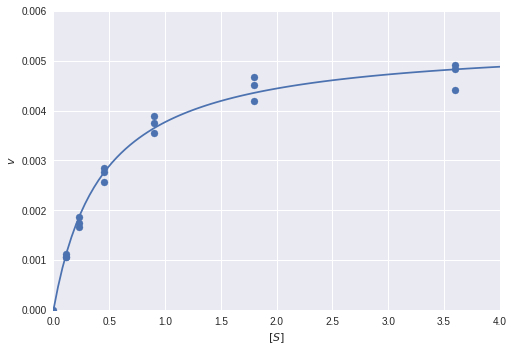

In [0]:
plt.scatter(s_real, v_real)
s_plot = np.linspace(0, 4, 100)
plt.plot(s_plot, v(s_plot, res.x[0], res.x[1]))
plt.xlim([0, 4])
plt.ylim([0, 0.006])
plt.xlabel('$[S]$')
plt.ylabel('$v$')
plt.show()